In [2]:
#This notebook was originally copied from https://www.kaggle.com/samiaimad/ai-uni-project. 
#This copy is to make changes of my own 
#using virtual environment VoiceRec1
#Rogier Landman 2022

import pandas as pd
import numpy as np
import os
import sys
import glob
import re
import splitfolders
import random
import shutil
from vad import VoiceActivityDetector

# librosa is a Python library for analyzing audio and music.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import soundfile as sf
import skimage

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt
import math

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from PIL import Image


import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

# **Assigning Data Paths to Variables**

In [3]:
Ravdess = "/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24"
CremaD = "/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV"
Tess = "/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data"
Savee = "/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData"


# **Ravdess-emotional-speech-audio data set**

In [4]:
ravdess=glob.glob(Ravdess + "/*/*.wav")

emotion=[]
path=[]
gender=[]
intensity=[]
for i in ravdess:
    #print(i)
    isplit= i.split('.')[0]
    isplit=isplit.split('-')
    emotion.append(int(isplit[2]))
    gend=int(isplit[6])
    if gend%2==0:
        gender.append('Female')
    else:
        gender.append('Male')
    intensity.append(int(isplit[3]))
    for sp in emotion:
        if sp=="1":
            intensity.append('Normal')
    path.append(i)
edf=pd.DataFrame(emotion, columns=['Emotions'])
pdf=pd.DataFrame(path, columns=['Path'])
gdf=pd.DataFrame(gender, columns=['Gender'])
idf=pd.DataFrame(intensity, columns=['Intensity'])

ravdess_df=pd.concat([edf, pdf, gdf, idf], axis=1)

ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
ravdess_df.Intensity.replace({1:'Normal', 2:'Strong'}, inplace=True)
ravdess_df.head()
ravdess_df.isnull()
ravdess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   1440 non-null   object
 1   Path       1440 non-null   object
 2   Gender     1440 non-null   object
 3   Intensity  1440 non-null   object
dtypes: object(4)
memory usage: 45.1+ KB


# **Cremad data set**

In [5]:
crema=glob.glob(CremaD + "/*.wav")

emotion=[]
path=[]
gender=[]
intensity=[]
for f in crema:
    part2= Path(f).stem
    part2=part2.split('_')
    #print(part2)
    if int(part2[0])%2==0:
        gender.append('Female')
    else:
        gender.append('Male')
        
    if part2[2] == 'SAD':
        emotion.append('sad')
    elif part2[2] == 'ANG':
        emotion.append('angry')
    elif part2[2] == 'DIS':
        emotion.append('disgust')
    elif part2[2] == 'FEA':
        emotion.append('fear')
    elif part2[2] == 'HAP':
        emotion.append('happy')
    elif part2[2] == 'NEU':
        emotion.append('neutral')
    else:
        emotion.append('Unknown')
        
    if part2[3]=='HI':
        intensity.append('High')
    elif part2[3]=='LO':
        intensity.append('Low')
    elif part2[3]=='MD':
        intensity.append('Medium')
    elif part2[3]=='XX':
        intensity.append('Unspecified')
        
    path.append(f)
    
edf=pd.DataFrame(emotion, columns=['Emotions'])
pdf=pd.DataFrame(path, columns=['Path'])
gdf=pd.DataFrame(gender, columns=['Gender'])
idf=pd.DataFrame(intensity, columns=['Intensity'])

crema_df=pd.concat([edf, pdf, gdf, idf], axis=1)
crema_df.head()
crema_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7442 entries, 0 to 7441
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   7442 non-null   object
 1   Path       7442 non-null   object
 2   Gender     7442 non-null   object
 3   Intensity  7441 non-null   object
dtypes: object(4)
memory usage: 232.7+ KB


# **Toronto-emotional-speech-set-tess data set**

In [6]:
tess=glob.glob(Tess + "/*/*.wav")

emotion=[]
path=[]
gender=[]
intensity=[]

for i in tess:
    part2= Path(i).stem
    fsplit=part2.split('_')[2]
    if fsplit=='ps':
        emotion.append('surprise')
    else:
        emotion.append(fsplit)
    gender.append('Female')
    path.append(i)
    intensity.append('Unspecified')
        
edf=pd.DataFrame(emotion, columns=['Emotions'])
pdf=pd.DataFrame(path, columns=['Path'])
gdf=pd.DataFrame(gender, columns=['Gender'])
idf=pd.DataFrame(intensity, columns=['Intensity'])

tess_df=pd.concat([edf, pdf, gdf, idf], axis=1)
tess_df.head()
tess_df.isnull()
tess_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   2800 non-null   object
 1   Path       2800 non-null   object
 2   Gender     2800 non-null   object
 3   Intensity  2800 non-null   object
dtypes: object(4)
memory usage: 87.6+ KB


# **Savee Dataset**

In [7]:
savee=glob.glob(Savee + "/*/*.wav")

emotion=[]
path=[]
gender=[]
intensity=[]

for f in savee:
    #dsplit = d.split(".")[0]
    #llsplit=re.split('\d+',dsplit[0])
    #print(llsplit)
    part2= Path(f).stem
    elist=part2[0]
    if elist=='a':
        emotion.append('angry')
    elif elist=='d':
        emotion.append('disgust')
    elif elist=='f':
        emotion.append('fear')
    elif elist=='h':
        emotion.append('happy')
    elif elist=='n':
        emotion.append('neutral')
    elif elist=='sa':
        emotion.append('sad')
    else:
        emotion.append('surprise')
    gender.append('Male')
    path.append(f)
    intensity.append('Unspecified')

edf=pd.DataFrame(emotion, columns=['Emotions'])
pdf=pd.DataFrame(path, columns=['Path'])
gdf=pd.DataFrame(gender, columns=['Gender'])
idf=pd.DataFrame(intensity, columns=['Intensity'])

savee_df=pd.concat([edf, pdf, gdf, idf], axis=1)
#savee_df.head()
savee_df.isnull()
savee_df.info()
savee_df.tail()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   480 non-null    object
 1   Path       480 non-null    object
 2   Gender     480 non-null    object
 3   Intensity  480 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


,Emotions,Path,Gender,Intensity
475,surprise,/Users/rogierlandman/from_Samsung/Machine_lear...,Male,Unspecified
476,happy,/Users/rogierlandman/from_Samsung/Machine_lear...,Male,Unspecified
477,fear,/Users/rogierlandman/from_Samsung/Machine_lear...,Male,Unspecified
478,fear,/Users/rogierlandman/from_Samsung/Machine_lear...,Male,Unspecified
479,neutral,/Users/rogierlandman/from_Samsung/Machine_lear...,Male,Unspecified


# **Combining DataFrames (ravdess_df, crema_df,tess_df, savee_df)**

In [43]:
Data_Combined = pd.concat([ravdess_df, crema_df,tess_df, savee_df], axis = 0, ignore_index = True)
Data_Combined.isnull()
Data_Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Emotions   12162 non-null  object
 1   Path       12162 non-null  object
 2   Gender     12162 non-null  object
 3   Intensity  12161 non-null  object
dtypes: object(4)
memory usage: 380.2+ KB


# **Data Visualization**

In [ ]:
x = []
flag = 0

while (flag != 2000): 
   
    audio = wave.open(Data_Combined.iloc[flag, 1], 'r')
    flag = flag + 1 
    y= Data_Combined.iloc[flag, 0]
    if (len(x)>10):
        flag=2000    

    if (y not in x):
        signal = np.frombuffer(audio.readframes(-1), dtype=np.int16)
        plt.figure(figsize=(12,12))
        plot1 = plt.subplot(211)
        plot1.set_title(Data_Combined.iloc[flag, 0])
        plot1.plot(signal)
        plot1.set_xlabel('time * Number of samples')
        plot1.set_ylabel('energy')

        plot2 = plt.subplot(212)
        plot2.specgram(signal, NFFT=1024, Fs=12281, noverlap=900)
        plot2.set_xlabel('Time')
        plot2.set_ylabel('Frequency')
        
        x.append(y)

plt.show()

# **Data Augmentation**

In [44]:
def stretch(data, rate):
    return librosa.effects.time_stretch(data, rate)

#x , sr = librosa.load('/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_DFA_ANG_XX.wav')
#ya = stretch(x, 1.05)
#librosa.display.waveshow(y=x, sr=sr)
#librosa.display.waveshow(y=ya, sr=sr)



In [45]:
def white_noise(data,SNR):
    RMS_s=math.sqrt(np.mean(data**2))
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, data.shape[0])
    data_noise=noise+data
    return data_noise 

#x , sr = librosa.load('/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_DFA_ANG_XX.wav')
#ya = white_noise(x, 20)
#librosa.display.waveshow(y=x, sr=sr)
#librosa.display.waveshow(y=ya, sr=sr)



In [46]:
def shifting_time(data, sampling_rate, shift_max, shift_direction):
    shift = np.random.randint(sampling_rate * shift_max)
    if shift_direction == 'right':
        shift = -shift
    elif shift_direction == 'both':
        direction = np.random.randint(0, 2)
        if direction == 1:
            shift = -shift
    augmented_data = np.roll(data, shift)
    # Set to silence for heading/ tailing
    #if shift > 0:
    #    augmented_data[:shift] = 0
    #else:
    #    augmented_data[shift:] = 0
    return augmented_data

#x , sr = librosa.load('/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_DFA_ANG_XX.wav')
#ya = shifting_time(x, 16000, 0.5, 'right')
#librosa.display.waveshow(y=x, sr=sr)
#librosa.display.waveshow(y=ya, sr=sr)



In [47]:
def pitch(data, sampling_rate, pitch_factor):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)
#x , sr = librosa.load(audio_data)
#ya = pitch(x,sr,pitch_factor=0.5)
#plt.figure(figsize=(14,4))
#librosa.display.waveplot(y=ya, sr=sr)
#Audio(ya, rate=sr)

## Creating Spectograms images from Audio files (old)

In [ ]:
bad_ones = []

output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/temp/"
if  not os.path.exists(os.path.join(output_path, 'audio-spectrograms')):
    os.mkdir(os.path.join(output_path, 'audio-spectrograms'))
    
#function to get sound and frame rate info
def get_audio_info(audio_path):
    frame_rate, audio_info = wavfile.read(audio_path)
    return audio_info, frame_rate

for f in range (len(Data_Combined)):
        file_Path = f'{Data_Combined.iloc[f, 1]}'
        #print (file_path)
        file_stem = Path(file_Path).stem
        #print (file_stem)
        target_dir = f'class_{Data_Combined.iloc[f, 0]}'
        #print (target_dir)
        dist_dir = os.path.join(os.path.join(output_path, 'audio-spectrograms'), target_dir)
        #print (dist_dir)
        # ex: ./audio-spectrograms/class_fear
        file_dist_path = os.path.join(dist_dir, file_stem)
        #ex: ./audio-spectrograms/class_fear/03-01-06-02-02-01-10
        
    
        if not os.path.exists(file_dist_path + '.png'):
            if not os.path.exists(dist_dir):
                os.mkdir(dist_dir)
            file_stem = Path(file_Path).stem
            try:
                audio_info, frame_rate = get_audio_info(file_Path)
                pylab.specgram(audio_info, Fs=frame_rate)
                pylab.savefig(f'{file_dist_path}.png')
                pylab.close()
                print(file_Path)
            except:
                bad_ones.append(file_Path)
                print('BAD: ' + file_Path)

## Spectrograms for augmented audio

In [73]:
#replicate folder structure

input_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/"
output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio-spectrograms/"

for dirpath, dirnames, filenames in os.walk(input_path):
    structure = os.path.join(output_path, dirpath[len(input_path):])
    if not os.path.isdir(structure):
        os.mkdir(structure)
    else:
        print("Folder already exists!")
        
        

Folder already exists!


In [ ]:
bad_ones = []

#make spectrograms

input_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/"
output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio-spectrograms/"

#shutil.rmtree(os.path.join(output_path,'class_angry'))
#os.makedirs(os.path.join(output_path,'class_angry'))
#shutil.rmtree(os.path.join(output_path,'class_disgust'))
#os.makedirs(os.path.join(output_path,'class_disgust'))
#shutil.rmtree(os.path.join(output_path,'class_fear'))
#os.makedirs(os.path.join(output_path,'class_fear'))
#shutil.rmtree(os.path.join(output_path,'class_happy'))
#os.makedirs(os.path.join(output_path,'class_happy'))
#shutil.rmtree(os.path.join(output_path,'class_neutral'))
#os.makedirs(os.path.join(output_path,'class_neutral'))
#shutil.rmtree(os.path.join(output_path,'class_sad'))
#os.makedirs(os.path.join(output_path,'class_sad'))
#shutil.rmtree(os.path.join(output_path,'class_surprise'))
#os.makedirs(os.path.join(output_path,'class_surprise'))


#function to get sound and frame rate info
def get_audio_info(audio_path):
    wav = wave.open(audio_path, 'r')
    
    frames = wav.readframes(-1)
    audio_info = frames, 'int16'
    frame_rate = wav.getframerate()
    wav.close()
    return audio_info, frame_rate

for dirpath, dirnames, filenames in os.walk(input_path):
    for file in filenames:
        if (file[-3:] == 'wav'):
            tmp = os.path.join(dirpath,file)
            file_Path=Path(tmp)
            file_stem = Path(file_Path).stem
            class_dir = file_Path.parts[-2]
            new_path = os.path.join(output_path, class_dir, file_stem)                                 

            if not os.path.exists(new_path + '.png'):
                print(str(file_Path))
                if not file_Path == '/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_long_fear_aug1.wav':
                    try:
                        audio_info, frame_rate = get_audio_info(str(file_Path))
                        pylab.specgram(audio_info, Fs=frame_rate)
                        pylab.savefig(f'{new_path}.png')
                        pylab.close()
                        #print(file_Path)
                    except:
                        bad_ones.append(file_Path)
                        print('BAD: ' + file_Path)

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_long_fear_aug1.wav


In [15]:
bad_ones = []

#make spectrograms

input_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/"
output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio-spectrograms/"

shutil.rmtree(os.path.join(output_path,'class_angry'))
os.makedirs(os.path.join(output_path,'class_angry'))
shutil.rmtree(os.path.join(output_path,'class_disgust'))
os.makedirs(os.path.join(output_path,'class_disgust'))
shutil.rmtree(os.path.join(output_path,'class_fear'))
os.makedirs(os.path.join(output_path,'class_fear'))
shutil.rmtree(os.path.join(output_path,'class_happy'))
os.makedirs(os.path.join(output_path,'class_happy'))
shutil.rmtree(os.path.join(output_path,'class_neutral'))
os.makedirs(os.path.join(output_path,'class_neutral'))
shutil.rmtree(os.path.join(output_path,'class_sad'))
os.makedirs(os.path.join(output_path,'class_sad'))
shutil.rmtree(os.path.join(output_path,'class_surprise'))
os.makedirs(os.path.join(output_path,'class_surprise'))

In [49]:
input_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/"
output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio-spectrograms/"

#function to get sound and frame rate info
def get_audio_info(audio_path):
    wav = wave.open(audio_path, 'r')
    frames = wav.readframes(-1)
    audio_info = pylab.frombuffer(frames, 'int16')
    frame_rate = wav.getframerate()
    wav.close()
    return audio_info, frame_rate

for dirpath, dirnames, filenames in os.walk(input_path):
    for file in filenames:
        if (file[-3:] == 'wav'):
            tmp = os.path.join(dirpath,file)
            file_Path=Path(tmp)
            file_stem = Path(file_Path).stem
            class_dir = file_Path.parts[-2]
            new_path = os.path.join(output_path, class_dir, file_stem)                                 

            if not os.path.exists(new_path + '.png'):
                try:
                    audio_info, frame_rate = get_audio_info(str(file_Path))
                    pylab.specgram(audio_info, Fs=frame_rate)
                    pylab.savefig(f'{new_path}.png')
                    pylab.close()
                    print(file_Path)
                except:
                    bad_ones.append(file_Path)
                    print('BAD: ' + file_Path)

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1086_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1027_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1018_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1003_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1076_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1049_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_team_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1091_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1052_IOM_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1063_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1061_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1025_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1084_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1013_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1030_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1074_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1032_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_cab_angry_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1050_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_keen_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1091_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1074_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1001_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1084_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1025_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1031_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1077_TAI_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1085_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_dip_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1074_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1082_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_merge_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1069_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_rain_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1038_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_tip_angry_aug1.wav
/Users

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1016_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1066_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_pool_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1081_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1020_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1064_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1049_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1072_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_jar_angry_aug1.wav
/Use

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/a10_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1038_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/a11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_kite_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_chat_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_mouse_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_south_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1002_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1006_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_S

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1070_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1072_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1036_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_neat_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1040_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1083_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1064_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1081_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1011_IOM_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1020_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1066_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1022_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1001_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1037_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_mill_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1073_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1071_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1049_WSI_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_death_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1066_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1059_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1083_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_king_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1042_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1068_IWW_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1048_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_juice_angry_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_note_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1034_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1021_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1057_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1077_IWW_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1062_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1070_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1065_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1033_IWL_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1061_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_pearl_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1030_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1090_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1085_IWW_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1076_IWW_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1056_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1063_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1035_ITS_ANG_XX_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1073_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1025_IWW_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1005_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1030_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1090_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1022_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1037_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1061_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1074_IWW_ANG_XX_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_rot_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1038_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1003_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1074_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_pain_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1070_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/a13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1021_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/a12_aug1.wav
/Users/rogierlandman/from_Sa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1049_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1076_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1072_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_shawl_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1085_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_hate_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1081_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1087_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1034_WSI_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1047_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1003_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_rag_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_keep_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1035_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1086_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1016_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1052_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_germ_angry_aug1.wav
/User

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1008_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_lid_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1089_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_vine_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1021_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1025_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1074_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1070_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1059_IWW_ANG_XX_aug1.wav
/Use

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1031_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1071_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_room_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1055_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1020_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1004_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1068_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1073_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1077_TSI_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_have_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1041_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/a03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/a02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1085_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1010_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_bite_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_red_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_such_angry_aug1.wav
/Users/rogierlandman/from_Sams

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1045_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1050_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_pick_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1040_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_ditch_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_hole_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1084_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1011_MTI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_jail_angry_aug1.wav
/Use

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1017_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1002_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1065_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/OAF_knock_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1061_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1030_TSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1034_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_door_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1059_TAI_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1083_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1014_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_team_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1046_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1002_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1070_WSI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1051_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1017_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1089_IEO_ANG_MD_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1052_TIE_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1016_TAI_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1088_IEO_ANG_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1050_DFA_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1044_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1060_IOM_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1015_IEO_ANG_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_raise_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1082_WSI_ANG_XX_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_hurl_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_dog_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1050_IWW_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1070_IEO_ANG_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1045_IWL_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/YAF_thought_angry_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1013_ITS_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1006_ITH_ANG_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1014_IWL_ANG_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1083_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1023_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1091_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1084_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_door_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1072_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1014_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1034_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_gin_fear_aug1.wav
/Users/rogierla

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1031_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_limb_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1047_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1067_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1072_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_loaf_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1060_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1075_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_team_fear_aug1.wav
/Users/rogierlan

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1061_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1074_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_dip_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1087_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_third_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_seize_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1071_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1020_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1080_IWL_FEA_XX_aug1.wav
/Users/rogierla

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1050_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_void_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_lease_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1059_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_witch_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1079_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_dip_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1008_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1028_IWW_FEA_XX_aug1.wav
/Users/rogierland

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_kill_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1003_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1007_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1050_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_dab_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1074_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1091_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1001_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_raise_fear_aug1.wav
/Users/rogierlan

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1025_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1090_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_far_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_jail_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1074_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1082_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_met_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_pick_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1040_WSI_FEA_XX_aug1.wav
/Users/rogierlandman

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1026_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1006_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1033_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1060_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_doll_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1083_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1084_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1031_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1091_IWL_FEA_XX_aug1.wav
/Users/rogie

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_boat_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1033_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1086_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1081_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_chain_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_shirt_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_sheep_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1062_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1026_DFA_FEA_XX_aug1.wav
/Users/rogierla

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1074_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1061_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1029_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1089_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1078_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_take_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_check_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1078_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1029_TAI_FEA_XX_aug1.wav
/Users/rogier

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1066_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1020_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1001_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1071_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1073_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1037_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1080_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1035_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_life_fear_aug1.wav
/Users/rogie

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1059_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1081_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1042_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1033_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1026_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_cheek_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1050_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1070_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1065_IWL_FEA_XX_aug1.wav
/Users/rogi

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_thought_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1086_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1058_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_rat_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1082_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1009_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_shack_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1058_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1078_IEO_FEA_LO_aug1.wav
/Users/rogier

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1056_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1040_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1004_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1042_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1081_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1032_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1013_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1011_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1055_TAI_FEA_XX_aug1.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_late_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1084_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1058_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1080_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1028_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_rain_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1091_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1004_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1055_MTI_FEA_XX_aug1.wav
/Users/rogierl

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_merge_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1043_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1056_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1044_IWW_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1064_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1051_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1007_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1012_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1002_MTI_FEA_XX_aug1.wav
/Users/rogi

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_shawl_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1049_IWL_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_bar_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_tape_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1018_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1027_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1023_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1072_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1049_IEO_FEA_HI_aug1.wav
/Users/rogierlan

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_jail_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1075_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_white_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1051_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_pick_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1003_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1047_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/f02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1045_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_S

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1045_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1083_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1030_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1014_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1002_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1046_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1070_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1053_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1089_IEO_FEA_MD_aug1.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1051_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1015_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1053_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_king_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1072_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1002_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_date_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1044_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1046_MTI_FEA_XX_aug1.wav
/Users/rogierl

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1046_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1031_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1035_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/YAF_take_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1064_TSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1060_IEO_FEA_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1049_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1088_IOM_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1018_TIE_FEA_XX_aug1.wav
/Users/rogie

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1050_ITH_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1045_ITS_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_beg_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1040_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1011_MTI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1084_IEO_FEA_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/OAF_make_fear_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1055_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1089_TSI_FEA_XX_aug1.wav
/Users/rogierla

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1013_IEO_FEA_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1007_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1041_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1005_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1077_WSI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1010_TAI_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1054_TIE_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1056_DFA_FEA_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_fear/1026_WSI_FEA_XX_aug1.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1088_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1028_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/h12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/h13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_raise_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_yes_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1081_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_gap_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1062_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Sam

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1087_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1062_IEO_HAP_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1085_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1059_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1046_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1037_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1022_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1054_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1074_IWW_HAP_XX_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_hurl_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_dog_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_thought_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_wheat_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1043_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1078_IEO_HAP_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1047_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_tool_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1088_TAI_HAP_XX_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1021_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1023_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_mop_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1002_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1072_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_limb_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1034_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1070_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_fail_happy_aug1.wav
/User

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1012_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1009_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1036_IEO_HAP_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_wire_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1041_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1045_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_bite_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1014_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1010_IEO_HAP_MD_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1051_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1029_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_kick_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_book_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1078_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1016_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1012_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1009_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1043_IEO_HAP_MD_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_tape_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1036_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_youth_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_cause_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1024_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1031_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_lid_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1047_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1067_IWW_HAP_XX_aug1.wav
/Use

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1071_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1022_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1082_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1037_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1017_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1061_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1074_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1066_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1046_IEO_HAP_LO_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1044_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1076_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1063_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1035_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1015_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1020_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1080_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1082_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1023_IEO_HAP_HI_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_dodge_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1088_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1038_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_bath_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1069_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_reach_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_rough_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1018_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1007_TSI_HAP_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1005_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1001_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_white_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_witch_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1028_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_said_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1079_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_learn_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_dip_happy_aug1.wav
/Use

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1026_IEO_HAP_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1087_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1074_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1030_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1032_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_date_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_sheep_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1042_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1063_DFA_HAP_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1051_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1071_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1082_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1017_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_chalk_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_wag_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1046_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_bar_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1018_TIE_HAP_XX_aug1.wav
/User

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1021_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_bought_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1002_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1046_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_reach_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_lore_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1070_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1030_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_met_happy_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1039_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1091_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1049_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1068_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1018_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1037_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1033_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_bone_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1028_IOM_HAP_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_walk_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1027_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1055_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1011_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_time_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1057_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_phone_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1076_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1006_DFA_HAP_XX_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1051_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1044_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_have_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1012_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1027_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1007_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1015_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1076_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1056_IWW_HAP_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_knock_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1022_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1068_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1073_IEO_HAP_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1077_TSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1020_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_limb_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1004_IEO_HAP_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1071_IOM_HAP_XX_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1083_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_hash_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1040_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1042_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_wire_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1006_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1061_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1013_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1057_TAI_HAP_XX_aug1.wav
/Us

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1042_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1040_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1004_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1032_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_size_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1081_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1072_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1056_IEO_HAP_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1069_IEO_HAP_MD_aug1.wav
/U

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1053_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1087_IOM_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1034_WSI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_hire_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1046_TIE_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1002_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_wash_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1044_DFA_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_thought_happy_aug1.wav
/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_half_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_ripe_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1048_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_hurl_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1019_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_shack_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_road_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1019_TAI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1087_IEO_HAP_MD_aug1.wav
/User

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1042_ITH_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1057_ITS_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1001_IWL_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1034_IEO_HAP_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1014_IWW_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1052_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/1003_MTI_HAP_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/OAF_calm_happy_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_happy/YAF_peg_happy_aug1.wav
/Use

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1037_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1059_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1066_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_fall_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1062_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_talk_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1001_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_pole_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1014_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Sa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1025_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_life_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1017_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1002_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1054_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1074_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1041_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1042_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1079_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1063_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1067_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1078_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1036_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1032_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1029_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1058_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_gap_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_tool_sad_aug1.wav
/Users/rogierlandman/from_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1020_WSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1060_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1044_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1031_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_lean_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1082_WSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1015_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1003_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1023_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1006_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_five_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1050_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1070_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1045_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1057_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1042_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1014_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1001_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1052_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1076_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1003_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_moon_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1038_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1027_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1056_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1043_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1035_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_dead_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_chalk_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_chain_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_bar_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1018_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1027_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1023_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1072_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1049_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Sams

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1064_WSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_dodge_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1014_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1016_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1052_TAI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1050_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1001_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1004_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1011_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1087_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_knock_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1008_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_sell_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1025_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1021_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1089_WSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1070_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1074_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/fro

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_youth_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1090_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_shall_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1054_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1089_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_have_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1048_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1019_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_shout_sad_aug1.wav
/Users/rogierlandman/from_Sa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1036_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1023_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1003_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1031_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1024_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1072_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1052_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1067_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1034_MTI_SAD_XX_aug1.wav
/Users/rogierlandma

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1053_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1073_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1066_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1030_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1025_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_rag_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_pool_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1078_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_should_sad_aug1.wav
/Users/rogierlandman/from_S

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1091_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1067_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1083_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1036_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1068_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_dime_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1039_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1010_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1014_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_rose_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1033_TAI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1077_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1075_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_dime_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1005_WSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1024_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1062_TAI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1026_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1071_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1064_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1032_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1027_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1007_IEO_SAD_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_jar_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1031_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1090_TAI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1015_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/fr

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1059_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1085_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_mode_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_rot_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1062_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1087_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1017_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1033_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_hit_sad_aug1.wav
/Users/rogierlandman/from_Sams

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1027_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1018_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1052_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1091_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1076_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1049_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_laud_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1062_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1024_TAI_SAD_XX_aug1.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1051_IEO_SAD_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1055_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1089_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1078_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1029_TIE_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_pass_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1069_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1038_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_sail_sad_aug1.wav
/Users/rogierlandman/from

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_cool_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1078_DFA_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_kill_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_calm_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_ditch_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1089_IWW_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_jug_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1068_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_door_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Mac

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1023_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_kill_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1083_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_calm_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1072_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1084_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1091_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1062_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1077_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1007_IOM_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1018_TSI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1023_IEO_SAD_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1082_TAI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1086_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/YAF_chief_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1070_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1021_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1081_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1022_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1071_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1087_ITS_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1080_IWL_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1020_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1068_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/OAF_cab_sad_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1039_MTI_SAD_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_sad/1029_ITH_SAD_XX_aug1.wav
/Users/rogierlandman/fr

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_calm_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1060_ITH_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1075_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1083_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1023_IWL_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1016_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_jar_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1036_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_bat

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1027_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1071_IWL_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1064_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1044_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1076_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1063_ITH_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1035_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1015_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1020_IWL

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1072_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_cool_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1083_IWL_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1023_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1078_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1059_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1029_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1002_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1006_TS

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1028_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_hush_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_chain_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1058_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1062_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1026_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1087_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1060_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1010_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1037_ITH_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1022_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_wash_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1029_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1009_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_life_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1078_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1058_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_so

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1074_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1076_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_reach_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1057_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1027_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1061_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1025_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_long_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1008_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1009_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1047_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1084_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1058_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1063_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1086_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1077_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1075_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1090_IEO

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1076_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1074_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_cool_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1004_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1044_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1085_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1060_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1087_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1015_IO

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_page_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_tool_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_rag_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_pad_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1089_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_hush_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1019_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1039_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_d

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1002_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_south_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1072_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1034_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1070_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_bought_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1036_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1083_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/106

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_dip_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_sour_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1065_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_rat_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1081_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1034_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1067_IWL_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1052_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1072_IW

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1061_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_thought_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1013_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1057_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1011_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_peg_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1005_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_red_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1021

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1022_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_dip_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1068_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1073_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_rat_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1077_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_sub_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_fit_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1028_IEO

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1086_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1071_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1075_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1024_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1020_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1088_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_dead_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_talk_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1009_I

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1014_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1064_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1045_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1003_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1047_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1035_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1086_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1075_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1051_IEO

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_mop_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1034_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1046_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1002_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1044_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1006_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1013_ITH_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_judge_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1065_I

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1085_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1036_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_shack_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1017_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1015_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1051_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1067_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_shout_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1053

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1060_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_keep_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1064_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_rain_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1035_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1031_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1018_IWW_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1038_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1049_I

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/d15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1028_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_pain_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1062_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1066_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_keen_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1079_IOM_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1015_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1082_WSI_DIS_XX_au

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_time_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1054_ITH_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1041_ITS_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_dog_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_goal_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1044_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1015_MTI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1080_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_sa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1024_IEO_DIS_LO_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1011_IWL_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1035_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1031_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_join_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1060_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1064_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_base_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1009_T

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1010_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1004_DFA_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1006_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1042_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1074_WSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1057_TIE_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1013_TAI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1089_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1055_DFA

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1059_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1037_IEO_DIS_MD_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1008_IEO_DIS_HI_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/1033_TSI_DIS_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_food_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_jar_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/YAF_have_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/OAF_thought_disgust_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_disgust/10

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1052_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1064_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1020_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-01-02-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1022_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-01-01-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_time_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1066_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutr

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-02-02-18_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1038_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-02-02-19_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-01-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1065_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1070_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-02-05_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_south_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1064_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_thought_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1037_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1022_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-02-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1074_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-02-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_knock_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-02-01-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1051_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-02-02-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-02-01-02-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-02-01-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_ripe_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1021_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1023_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/c

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1017_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-02-01-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1008_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1048_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-02-01-10_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-01-09_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1038_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_rain_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1076_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-02-02-22_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1074_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1030_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1028_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1006_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_judge_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-02-02-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neut

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1016_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-02-02-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_shout_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-01-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1067_ITS_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1072_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_shack_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1024_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_ne

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-01-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_love_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_neat_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-01-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1068_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-01-02-24_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-02-13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1078_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-02-01-13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_wire_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-02-02-18_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-01-02-01_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1082_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1030_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-01-05_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1090_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/c

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-02-02-16_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_should_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-01-01-05_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1060_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_voice_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-02-02-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_sell_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-01-02-01_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/au

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-02-01-01-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-02-02-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-02-01-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1026_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-01-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1078_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-01-02-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-02-01-10_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augmen

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1009_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-02-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1079_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-01-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-02-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1027_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1056_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-02-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/cl

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_goal_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-02-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1001_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-02-22_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_time_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-01-02-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-02-02-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1041_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1002_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-02-01-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-01-01-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1090_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-02-01-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1053_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-01-01-10_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-02-01-09_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1077_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1086_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1026_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-02-02-05_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1060_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1075_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-02-02-01_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-01-01-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_n

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1087_ITS_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-02-01-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-02-01-13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-02-02-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1080_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1020_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-02-02-16_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-01-02-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1004_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-01-22_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1081_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_mob_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-01-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1055_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-02-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-01-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/cl

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-01-10_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-02-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1022_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-01-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-02-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1073_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-01-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-01-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augmen

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1056_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-01-01-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-01-01-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1049_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-02-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-02-01-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/n25_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-01-02-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neu

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-01-01-12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_base_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-02-19_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_join_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-02-01-01-24_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-01-02-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1088_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-01-02-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/a

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1061_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-02-01-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_thin_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-01-02-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-02-02-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-02-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_wheat_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-01-01-01-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_tip_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-01-02-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1067_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-02-01-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-02-01-01-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-01-02-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1078_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-02-01-10_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1037_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_cheek_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1077_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1007_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1005_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1059_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1041_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1026_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1054_T

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1040_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_met_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-01-01-04_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-02-19_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1011_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-02-01-12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-01-02-01_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-02-18_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1035_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1064_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-01-22_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-01-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1056_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1012_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-02-01-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1054_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_n

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1052_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-02-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1050_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1014_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1073_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1001_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1045_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1003_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-02-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/n20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-01-02-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-02-01-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-01-02-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1088_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1015_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1049_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_kick_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-01-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-02-02-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-01-01-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-02-02-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-01-02-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-02-02-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-01-01-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-02-01-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1008_ITS_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-02-01-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-01-01-24_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1003_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1016_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1040_ITS_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1055_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_n

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-01-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-02-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-01-01-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1019_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_rot_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-01-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1047_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-02-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_sail_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-02-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-01-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-02-15_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-01-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1053_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1022_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1073_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/c

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-01-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-02-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1014_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1016_TIE_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1052_TAI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-01-02-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-01-02-12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-01-19_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1046_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1053_IWL_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-02-02-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1005_ITS_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_size_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1010_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-02-02-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-02-01-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-01-02-04_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-02-01-12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1057_ITS_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-01-02-01-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1042_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-01-02-05_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-02-02-01-13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-02-02-01-18_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augmen

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1044_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-01-02-04_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-01-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1002_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-01-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1053_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/n12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1067_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1049_

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-01-01-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_gaze_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-05-02-01-01-22_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1021_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_juice_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-02-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1011_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-01-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/YAF_wife_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1008_DFA_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-02-03_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-01-01-01-08_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1056_IEO_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-01-11_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-02-02_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1078_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/c

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1020_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_sour_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_dip_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1077_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1068_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-02-02-23_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1026_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1039_IOM_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OA

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-02-01-12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-02-02-02-18_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-02-01-02-01_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1008_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-02-01-13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_pass_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-02-01-24_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-01-02-02-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augme

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1009_IWW_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-04-01-02-02-17_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-03-02-01-01-05_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-02-06_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-06-02-02-01-14_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1088_WSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-01-01-01-02-07_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1024_TSI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/aud

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-01-12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1046_ITH_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-02-01-02-02-04_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-01-01-21_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/OAF_check_neutral_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-07-02-01-01-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/1056_MTI_NEU_XX_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_neutral/03-01-08-01-01-02-20_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/a

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_road_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_deep_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_lot_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_cause_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_tire_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_raid_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_thumb_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_dip_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_make_ps_aug1.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_thought_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_have_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_bath_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_page_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_read_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/sa12_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/sa13_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_seize_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_red_ps_aug1.wav
/Users/rogierlandman/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_dog_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_join_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_hurl_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_fit_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_juice_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_rot_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_bean_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_love_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_bar_ps_aug1.wav
/Users/rogier

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_lease_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_size_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_numb_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_pike_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_calm_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_live_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_gun_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_rain_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_tell_ps_aug1.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_hit_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_when_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_chat_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_dead_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_choice_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_boat_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_tip_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/YAF_beg_ps_aug1.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_surprise/OAF_hire_ps_aug1.wav
/Users/rogi

In [80]:
print(file_Path)

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/class_angry/1086_TAI_ANG_XX_aug1.wav


## Checking duration of audio samples

In [ ]:
output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/temp1/"
    
duration = []

for f in range (len(Data_Combined)):
    
    file_Path = f'{Data_Combined.iloc[f, 1]}'

    #load audio ..
    data, samplerate = sf.read(file_Path)

    #resample
    duration.append(len(data) / samplerate)

plt.hist(duration)




It turns out that there is quite a bit of variation in the length of audio samples and there are considerable periods of no signal (quiet) in the audio. 

It makes sense to try a different approach, which is to put all samples of one category together, remove quiet parts, and then re-segment into pieces of a single length

## New approach

This did not turn out as good as expected

In [42]:
def scale_minmax(X, min=0.0, max=1.0):
    X_std = (X - X.min()) / (X.max() - X.min())
    X_scaled = X_std * (max - min) + min
    return X_scaled

def spectrogram_image(y, sr, out, fft_length, hop_length, n_mels):
    # use log-melspectrogram
    mels = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels, n_fft=fft_length, hop_length=hop_length)
    mels = np.log(mels + 1e-9) # add small number to avoid log(0)

    # min-max scale to fit inside 8-bit range
    img = scale_minmax(mels, 0, 255).astype(np.uint8)
    img = np.flip(img, axis=0) # put low frequencies at the bottom in image
    img = 255-img # invert. make black==more energy

    # save as PNG
    skimage.io.imsave(out, img)


output_path="/Users/rogierlandman/from_Samsung/Machine_learning_datasets/temp1/"

target_samplerate = 22050
hop_length = 256 # number of samples per time-step in spectrogram
fft_length = 1024 #length of fft
n_mels = 128 # number of bins in spectrogram. Height of image
#desired segment length in seconds
segment_length = 2
segment_length_samp = np.round(segment_length * target_samplerate)  

labels = ['neutral','angry','disgust','fear','happy','sad','surprise']
#labels = ['angry','disgust','fear','happy','sad','surprise']
   
for label in labels:
    
    print(label, ' accumulate data')
    lst = []
    cumdata = np.array(lst)
    for f in range (len(Data_Combined)):
    #    for f in range (3):

        #print(str(f), 'of ', str(len(Data_Combined)))
        file_Path = f'{Data_Combined.iloc[f, 1]}'
        #file_stem = Path(file_Path).stem
        #print(Data_Combined.iloc[f, 0])
        tmp = Data_Combined.iloc[f, 0]
        if(tmp == label):  
            
            try:

                v = VoiceActivityDetector(file_Path)
                tmp = v.detect_speech()

                z = tmp.shape[0]

                new_data = np.array(lst)

                for i in range(0, z-1):
                    if(tmp[i,1] == 1):

                        a=int(tmp[i+1,0])
                        b=int(tmp[i,0])
                        data=v.data[b:a]                 
                        new_data = np.concatenate([new_data,data])

                if(new_data.size>1):        
                    new_data=new_data.astype(float)
                    new_data = librosa.resample(new_data, orig_sr=v.rate, target_sr=target_samplerate)
                    c_mx = np.max(new_data) 
                    c_mn = np.min(new_data)
                    new_data = 2 * ((new_data - c_mx) / (c_mx - c_mn)) + 1 

                cumdata = np.concatenate([cumdata,new_data])
                
            except:
                
                print('Bad: ', file_Path )

                
    print(label, ' spectrograms')
    
    #chop into pieces
    n_pieces = 0
    labelstring = 'class_' + label
    if  not os.path.exists(os.path.join(output_path,  'audio-spectrograms', labelstring)):
        os.mkdir(os.path.join(output_path, 'audio-spectrograms', labelstring))

    while(len(cumdata)>segment_length_samp):
        n_pieces += 1
        tmp = cumdata[:segment_length_samp]

        #make spectrogram ..
        s1 = str(n_pieces).zfill(4)
        s2 = 'sample_' + s1 + '.png'
        
        target_path = os.path.join(output_path, 'audio-spectrograms',labelstring, s2)
        spectrogram_image(tmp, target_samplerate, target_path, fft_length, hop_length, n_mels)

        #remove from big array ..
        cumdata = np.delete(cumdata, np.s_[:segment_length_samp])
    
    

neutral  accumulate data
neutral  spectrograms
angry  accumulate data
Bad:  /Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_germ_angry.wav
angry  spectrograms
disgust  accumulate data
disgust  spectrograms
fear  accumulate data
Bad:  /Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_neat_fear.wav
fear  spectrograms
happy  accumulate data
happy  spectrograms
sad  accumulate data
sad  spectrograms
surprise  accumulate data
surprise  spectrograms


## Spectrogram augmentation

In [ ]:
#this would be done if you augment spectrograms 
#using frequency mask and time mask
#https://towardsdatascience.com/audio-deep-learning-made-simple-part-3-data-preparation-and-augmentation-24c6e1f6b52

def freq_mask(data, F):
        
        v = data.shape[1] # no. of bins       
        # apply F frequency masks to the spectrogram
        for i in range(F):
            f = int(np.random.uniform(0, F)) # [0, F)
            f0 = random.randint(0, v - f) # [0, v - f)
            data[:, f0:f0 + f, :, :] = 0          
        return data
    
    
def time_mask(data, T):

    tau = data.shape[2] # time points
    # apply T time masks to the spectrogram
    for i in range(T):
        t = int(np.random.uniform(0, T)) # [0, T)
        t0 = random.randint(0, tau - t) # [0, tau - t)
        data[:, :, t0:t0 + t, :] = 0
    return data
    

#replicate directory structure ..
inputpath = '/Users/rogierlandman/from_Samsung/Machine_learning_datasets/temp/audio-spectrograms/'
outputpath = '/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/spectrograms/'

for dirpath, dirnames, filenames in os.walk(inputpath):
    structure = os.path.join(outputpath, dirpath[len(inputpath):])
    if not os.path.isdir(structure):
        os.mkdir(structure)
    else:
        print("Folder already exists!")

        
#loop through spectrogram files and augment .. 
for root, directories, file in os.walk(inputpath):
    for file in file:
        if(file.endswith(".png")):
            #load the file
            img = Image.open(file)
            
            #choose frequency or time mask
            z = random.randint(0,1)
            #apply
            if(z):
                img = freq_mask(data, 10)
            else:
                img = time_mask(data, 10)
            
            #save new image
            file_stem = Path(file).stem
            new_name = file_stem + '_aug1.png'
            
            tmp = os.path.join(root,file)
            p=Path(tmp)
            class_dir = p.parts[-2]
            new_path = os.path.join(outputpath, class_dir, new_name)
            
            #to do: save as png image
            

In [48]:
#this would be done if you augment audio but then you need time to calculate spectrograms as well

#loop through wav files and augment .. 
dest_dir = '/Users/rogierlandman/from_Samsung/Machine_learning_datasets/augment/audio/'

shutil.rmtree(os.path.join(dest_dir,'class_angry'))
os.makedirs(os.path.join(dest_dir,'class_angry'))
shutil.rmtree(os.path.join(dest_dir,'class_disgust'))
os.makedirs(os.path.join(dest_dir,'class_disgust'))
shutil.rmtree(os.path.join(dest_dir,'class_fear'))
os.makedirs(os.path.join(dest_dir,'class_fear'))
shutil.rmtree(os.path.join(dest_dir,'class_happy'))
os.makedirs(os.path.join(dest_dir,'class_happy'))
shutil.rmtree(os.path.join(dest_dir,'class_neutral'))
os.makedirs(os.path.join(dest_dir,'class_neutral'))
shutil.rmtree(os.path.join(dest_dir,'class_sad'))
os.makedirs(os.path.join(dest_dir,'class_sad'))
shutil.rmtree(os.path.join(dest_dir,'class_surprise'))
os.makedirs(os.path.join(dest_dir,'class_surprise'))

for f in range (len(Data_Combined)):
 
    file_Path = f'{Data_Combined.iloc[f, 1]}'
    print(file_Path)
    x, sr = librosa.load(file_Path)
    file_stem = Path(file_Path).stem

    R = random.randint(1,4)
    if(R==1):
    
        #pick value for pitch shift
        pick = random.uniform(-1,1)
        x = pitch(x,sr, pitch_factor = pick)

    if(R==2):
    
        #pick value for time shift
        pick = random.uniform(0,0.5)
        x = shifting_time(x,sr,shift_max=pick,shift_direction='both')

    if(R==3):
        
        #pick value for white noise
        pick = 20
        x = white_noise(x,SNR=pick)

    if(R==4):
    
        #pick value for time stretch
        pick = random.uniform(0.95,1.05)
        x = stretch(x, pick)

    target_dir = f'class_{Data_Combined.iloc[f, 0]}'
    dest_dir1 = os.path.join(dest_dir, target_dir)
    dest_path = os.path.join(dest_dir1, file_stem + '_aug1.wav')

    if not os.path.exists(dest_dir1):
        os.mkdir(dest_dir1)


    sf.write(dest_path, x, sr, 'PCM_16')
   

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-05-01-02-01-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-06-01-02-02-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-06-02-01-02-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-05-02-01-01-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-07-01-01-01-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-04-01-01-02-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_16/03-01-04-02-02-02-16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-02-02-01-01-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-01-02-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-03-02-02-02-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-04-02-02-02-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-07-02-02-01-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-07-01-01-01-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_11/03-01-04-01-01-02-11.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-06-01-01-02-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-05-01-01-01-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-05-02-02-01-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-06-02-02-02-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-04-01-02-02-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-07-01-02-01-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_18/03-01-07-02-01-01-18.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-05-02-02-01-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-05-01-01-01-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-06-01-01-02-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-01-01-01-02-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-02-01-01-01-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-02-02-02-01-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_20/03-01-03-01-02-02-20.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-04-02-01-02-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-03-02-01-02-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-03-01-02-02-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-02-02-02-01-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-02-01-01-01-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-01-01-01-02-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_21/03-01-03-02-02-01-21.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-05-01-01-01-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-06-01-01-02-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-08-01-02-01-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-08-02-01-01-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-07-02-02-02-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-04-02-02-01-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_19/03-01-04-01-01-01-19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-08-02-02-01-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-08-01-01-01-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-05-01-01-02-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-06-01-01-01-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-06-02-02-01-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-05-02-02-02-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_10/03-01-07-01-02-02-10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-01-01-01-01-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-02-01-01-02-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-02-02-02-02-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-03-01-02-01-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-03-02-01-01-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-04-02-01-01-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_17/03-01-07-02-01-02-17.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-06-02-02-01-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-04-01-02-01-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-07-01-02-02-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-07-02-01-02-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-04-02-01-01-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-08-02-01-02-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_04/03-01-08-01-02-02-04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-07-02-01-02-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-04-02-01-01-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-04-01-02-01-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-07-01-02-02-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-05-02-02-02-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-06-02-02-01-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_03/03-01-06-01-01-01-03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-06-02-02-01-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-05-02-02-02-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-07-01-02-02-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-04-01-02-01-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-04-02-01-01-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-07-02-01-02-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_02/03-01-08-02-01-02-02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-01-01-01-01-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-02-01-01-02-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-02-02-02-02-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-03-01-02-01-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-03-02-01-01-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-05-01-02-02-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_05/03-01-06-01-02-01-05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-02-02-02-02-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-03-02-01-01-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-08-02-02-02-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-08-01-01-02-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-05-01-02-02-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_12/03-01-06-01-02-01-12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-01-01-02-01-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-02-01-02-02-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-02-02-01-02-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-03-01-01-01-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-03-02-02-01-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-08-01-01-02-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_15/03-01-08-02-02-02-15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-02-02-02-02-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-01-01-01-01-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-02-01-01-02-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-05-01-01-02-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-06-01-01-01-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-06-02-02-01-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_23/03-01-05-02-02-02-23.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-06-02-02-01-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-05-02-02-02-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-05-01-01-02-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-06-01-01-01-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-08-01-02-02-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-08-02-01-02-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_24/03-01-01-01-01-01-24.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-04-01-02-01-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-07-01-02-02-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-05-02-02-02-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-06-02-02-01-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-06-01-01-01-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-05-01-01-02-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_22/03-01-08-01-02-02-22.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-06-02-01-01-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-04-01-01-01-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-07-01-01-02-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-07-02-02-02-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-04-02-02-01-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-08-02-01-01-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_14/03-01-08-01-02-01-14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-02-02-01-02-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-03-01-01-01-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-03-02-02-01-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-01-01-01-02-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-02-01-01-01-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-02-02-02-01-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_13/03-01-03-01-02-02-13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-02-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-08-01-01-01-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-08-02-02-01-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-04-02-02-02-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-07-02-02-01-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-07-01-01-01-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_09/03-01-04-01-01-02-09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-02-02-02-01-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-03-01-02-02-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-03-02-01-02-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-08-01-02-01-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-08-02-01-01-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-07-02-01-01-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_07/03-01-04-02-01-02-07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-02-01-01-01-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-08-02-01-01-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-08-01-02-01-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-05-01-01-01-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-06-01-01-02-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-06-02-02-02-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_06/03-01-05-02-02-01-06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-06-02-02-02-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-05-02-02-01-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-05-01-01-01-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-06-01-01-02-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-01-01-01-02-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-02-01-01-01-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_01/03-01-02-02-02-01-01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ra

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_08/03-01-04-02-02-02-08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_08/03-01-03-02-02-02-08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_08/03-01-03-01-01-02-08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_08/03-01-02-02-01-01-08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_08/03-01-02-01-02-01-08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Ravdess_audio/audio_speech_actors_01-24/Actor_08/03-01-01-01-02-02-08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_ITS_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_I

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1009_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1080_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1010_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1005_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_TSI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_IOM_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_TAI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IEO_HAP_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_TSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1025_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1009_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1060_TSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1088_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1055_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_TAI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_TSI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_IOM_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_IOM_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_IOM_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_ITS_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_DFA_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_DFA_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1075_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1060_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_WSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1088_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1088_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_TAI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_ITS_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1080_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_TAI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_WSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_IOM_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_TSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_TAI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_WSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_ITS_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_ITS_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IOM_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IOM_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_WSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_WSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_ITS_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1055_ITS_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_IOM_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_IOM_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_IOM_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_TSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_TSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_IEO_HAP_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1010_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1005_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1060_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_WSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_WSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1025_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_IEO_HAP_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_TSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1025_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1075_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1060_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_IWL_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_IOM_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1055_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1080_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_WSI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_TAI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_TAI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_TSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1088_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_TAI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_TAI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1088_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_TAI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_TAI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1032_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1080_DFA_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1027_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_IWW_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_TAI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_TSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_TAI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1005_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1010_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_WSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_WSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1088_TAI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_IOM_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IOM_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1010_ITS_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_IOM_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_MTI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_MTI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_DFA_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_DFA_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_ITS_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IWL_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1059_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_IOM_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_IOM_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_TSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_ITS_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_ITS_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1042_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1057_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1055_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_IEO_ANG_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_IEO_HAP_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_WSI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_DFA_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1080_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_TIE_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_TSI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1009_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1075_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_IEO_HAP_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1011_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1004_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1025_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_MTI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1044_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1051_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1038_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_WSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_DFA_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1090_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_ITH_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1025_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1030_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1067_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1072_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_ITS_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1056_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1043_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_IOM_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1081_TSI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_TAI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1037_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_TSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_TAI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_TAI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1086_IEO_FEA_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1022_ITH_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1075_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1060_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1046_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1035_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1001_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1020_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1087_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_IEO_SAD_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1045_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1050_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_WSI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_TIE_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_IWW_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1076_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1063_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_TIE_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1054_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1089_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_MTI_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1080_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_TIE_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1034_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1021_TIE_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_MTI_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IEO_DIS_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_MTI_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_IOM_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1085_WSI_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1033_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1029_IWW_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1052_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1047_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_DFA_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1036_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1083_IEO_DIS_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1023_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1026_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1053_TIE_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1071_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1077_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1062_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_IEO_DIS_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1017_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1002_ITH_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_DFA_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1039_IEO_FEA_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_IEO_HAP_LO.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1068_WSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1049_WSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1015_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1013_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_ITH_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1082_DFA_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1018_IEO_ANG_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_IWL_SAD_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1069_IEO_SAD_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_TAI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1048_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1084_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1078_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1091_IOM_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1064_TAI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1061_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1074_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1040_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1055_TSI_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1073_IEO_FEA_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1006_IWL_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1007_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1012_IWW_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1008_IEO_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1028_ITH_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1019_DFA_DIS_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1009_ITH_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1003_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1016_IWW_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1041_IWW_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1010_TSI_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1014_IEO_SAD_HI.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1024_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1031_IWL_ANG_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1070_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1065_IEO_ANG_MD.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1058_ITS_HAP_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1066_IWL_NEU_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Crema-D_dataset/AudioWAV/1079_ITS_FEA_XX.wav
/Users/rogierlandman/from_Samsung/Machine_learning_data

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_search_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_late_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_peg_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_ring_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_tool_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_di

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_match_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_moon_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_pool_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_long_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_gun_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_dis

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_room_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_south_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_vine_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_yearn_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_king_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_d

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_thin_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_jail_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_death_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_soap_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_disgust/YAF_gas_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_dis

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pain_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_turn_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_size_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_lose_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pike_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotiona

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_doll_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_pass_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_door_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_sheep_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_soup_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotion

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_half_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_juice_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_hurl_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_tape_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_reach_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotio

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_kick_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mood_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_bar_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_jug_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_tough_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_hate_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_love_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_bought_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_peg_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_haze_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happ

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_rough_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_which_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_hurl_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_jail_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_tool_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_hush_happy.

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_calm_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_take_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_rot_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_hire_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_king_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_shout_happy.wa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_rush_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_merge_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_tip_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_germ_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_cool_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_long_happy.wa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_hate_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_dime_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_turn_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pad_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_kite_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_yes_sad.wav
/Users/rogierlandman

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_raid_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_white_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_doll_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_lease_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_fat_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_match_sad.wav
/Users/rogierlandman

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_page_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_lot_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_gaze_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_neat_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_cab_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_king_sad.wav
/Users/rogierlandman/fro

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_thought_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_rot_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_sail_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_cause_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_mess_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_limb_sad.wav
/Users/rogierlandma

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_team_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_jar_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_white_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_dab_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_death_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_fat_happy.wav

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_yearn_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_came_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_laud_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_live_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_shout_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_wheat_happy

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_week_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_pike_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_thin_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_walk_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_sour_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_witch_happy.w

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_life_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_juice_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_lease_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_wag_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_shall_happy.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_pass_happy.

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_mouse_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_merge_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_luck_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_far_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_shirt_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_n

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_keep_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_kick_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_hash_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_mode_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_raid_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neu

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_late_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_door_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_note_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_pearl_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_ditch_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_n

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_gun_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_live_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_match_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_moon_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neutral/YAF_long_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_neu

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_far_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_such_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_soup_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_name_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_lid_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_ditch_fear.wav
/Users/rogi

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_shout_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_keen_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_shack_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_thumb_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_bite_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_near_fear.wav
/Users/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_came_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_thought_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_gaze_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_bar_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_cause_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_book_fear.wav
/Users/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_food_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_road_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_gin_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_sure_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_laud_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Fear/OAF_life_fear.wav
/Users/rogi

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_team_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_gaze_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_kite_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_love_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_hall_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_wire_angry.wa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_youth_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_hole_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_long_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_cool_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_germ_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_came_angry.w

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_red_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_read_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_haze_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_peg_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_turn_angry.wa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_check_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_chain_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_cab_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_ton_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_seize_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_angry/OAF_tire_angry.w

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_fall_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_time_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_vote_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_gas_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_should_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto em

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_haze_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_red_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_lean_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_lease_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_page_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emo

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_south_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_wife_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_half_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_rain_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_wash_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto em

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_tool_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_neat_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_hate_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_phone_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_fail_ps.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto em

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_rose_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_sell_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_mill_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_home_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_fit_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_read_fear.wav
/Users/rogi

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_sail_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_haze_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_shirt_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_ton_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_page_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_tape_fear.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_bath_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_mood_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_kick_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_pole_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_thin_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_lose_fear.wav
/Users/rog

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_whip_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_lore_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_cheek_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_soap_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_raise_fear.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_tell_fear.wav
/Users/r

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_wire_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_dodge_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_learn_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_hate_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_hall_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_n

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_dip_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_thumb_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_make_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_tire_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_lot_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neut

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_pass_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_fat_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_ripe_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_voice_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_rush_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neu

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_bone_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_sub_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_dog_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_vote_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_week_neutral.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutr

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_gas_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_deep_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_get_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_hash_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_raid_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgu

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_have_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_bath_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_page_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_met_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_youth_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_dis

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_shack_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_pool_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_long_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_moon_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_sour_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_di

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_make_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_lot_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_tire_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_road_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disgust/OAF_pick_disgust.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_disg

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_lot_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_read_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_rough_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_haze_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_choice_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_mode_angry.

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_sail_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_size_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_dime_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_phone_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_mob_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_deep_angry.wa

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_tape_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_make_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_raise_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_fit_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_ring_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_keg_angry.wav

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_hole_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_vine_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_door_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_nice_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_chief_angry.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_angry/YAF_goal_angry.w

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_hire_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_came_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_wag_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_room_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_fat_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_mill_sad.wav
/Users/rogierlandman/fro

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_soap_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_keen_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_rat_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_long_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_chair_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_haze_sad.wav
/Users/rogierlandman/f

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_rot_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_note_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_lease_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_cab_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_hurl_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_wire_sad.wav
/Users/rogierlandman/fr

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_take_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_back_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_perch_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_moon_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_judge_sad.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_jar_sad.wav
/Users/rogierlandman/

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/h01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/n07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/n13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/su08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/su09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/a09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/a08.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/su01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/su15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/KL/a06.wav
/Users/rogierlandman/from_Samsung/Machine_lear

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/h04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n16.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n28.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/f09.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/h12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/sa13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/h06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/sa07.wav
/Users/rogierlandman/from_Samsung/Machine_learni

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/f05.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/d13.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/d07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/d06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/d12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/f04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/f10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n19.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n25.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/DC/n27.wav
/Users/rogierlandman/from_Samsung/Machine_learning

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/su07.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/a14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/a01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/a15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/su06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/su12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/su04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/su10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/a03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JE/a02.wav
/Users/rogierlandman/from_Samsung/Machine_lea

/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/sa03.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/h02.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/n10.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/n04.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/n12.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/n06.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/sa01.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/h14.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/sa15.wav
/Users/rogierlandman/from_Samsung/Machine_learning_datasets/Savee_dataset/AudioData/JK/sa14.wav
/Users/rogierlandman/from_Samsung/Machine_lear

# **Data Preparation**

In [50]:
# Declare constants
image_h = 128
image_w = 128
batch_size = 32
num_channel = 3
num_classes = 7
INPUT_DIR = '/Users/rogierlandman/from_Samsung/Machine_learning_datasets/temp/audio-spectrograms/'
OUTPUT_DIR = '/Users/rogierlandman/from_Samsung/Machine_learning_datasets/temp/output/'

splitfolders.ratio(INPUT_DIR, output=OUTPUT_DIR,
    seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)



In [51]:
# dataset training spectrograms
training_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=batch_size,
                                             validation_split=None,
                                             directory=os.path.join(OUTPUT_DIR, 'train'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(image_h, image_w),
                                             subset=None,
                                             seed=0)

# dataset validation spectrograms
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=batch_size,
                                             validation_split=None,
                                             directory=os.path.join(OUTPUT_DIR, 'val'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(image_h, image_w),
                                             subset=None,
                                             seed=0)

# dataset test spectrograms
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=batch_size,
                                             validation_split=None,
                                             directory=os.path.join(OUTPUT_DIR, 'test'),
                                             shuffle=True,
                                             color_mode='rgb',
                                             image_size=(image_h, image_w),
                                             subset=None,
                                             seed=0)

# dataset validation spectrogram
#validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
#                                             batch_size=batch_size,
#                                             validation_split=0.2,
#                                             directory=os.path.join(OUTPUT_DIR, 'audio-spectrograms'),
#                                             shuffle=True,
#                                             color_mode='rgb',
#                                             image_size=(image_h, image_w),
#                                             subset="validation",
#                                             seed=0)

Found 21239 files belonging to 7 classes.


2022-03-03 23:25:10.265342: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Found 1177 files belonging to 7 classes.
Found 1186 files belonging to 7 classes.


In [52]:
def prepare(ds):
    # Define our one transformation
    rescale = tf.keras.Sequential([tf.keras.layers.experimental.preprocessing.Rescaling(1./255)])
    ds = ds.map(lambda x, y: (rescale(x, training=True), y))
    return ds

training_dataset = prepare(training_dataset)
validation_dataset = prepare(validation_dataset)
test_dataset = prepare(test_dataset)





# **Modeling**

In [ ]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(image_h,image_w,num_channel)))
#convolution layer
model.add(tf.keras.layers.Conv2D(32,3,strides=2,padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
#pooling layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.BatchNormalization())
#fully connected layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu',kernel_regularizer='l1'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
#output layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

checkpoint_filepath = 'weights.{epoch:02d}-{val_accuracy:.2f}.h5'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

history=model.fit(training_dataset, epochs=10, validation_data=validation_dataset,callbacks=[model_checkpoint_callback])



Epoch 1/10
664/664 [==============================] - 147s 219ms/step - loss: 22.3656 - accuracy: 0.4339 - val_loss: 23.0666 - val_accuracy: 0.2506
Epoch 2/10
664/664 [==============================] - 147s 221ms/step - loss: 9.2489 - accuracy: 0.5570 - val_loss: 24.0813 - val_accuracy: 0.2090
Epoch 3/10
664/664 [==============================] - 147s 220ms/step - loss: 7.8685 - accuracy: 0.5947 - val_loss: 8.5807 - val_accuracy: 0.4851
Epoch 4/10
664/664 [==============================] - 147s 222ms/step - loss: 7.2013 - accuracy: 0.6253 - val_loss: 8.1797 - val_accuracy: 0.4511
Epoch 5/10
142/664 [=====>........................] - ETA: 2:01 - loss: 7.1885 - accuracy: 0.6281

todo
fix crappy spectrograms
back to features, do feature importance to learn what factors are important
also look at other efforts (kaggle)
Also look at other datasets (respiratory)
Investigate training loss and validation loss. How do you know it's not the network

Use gans



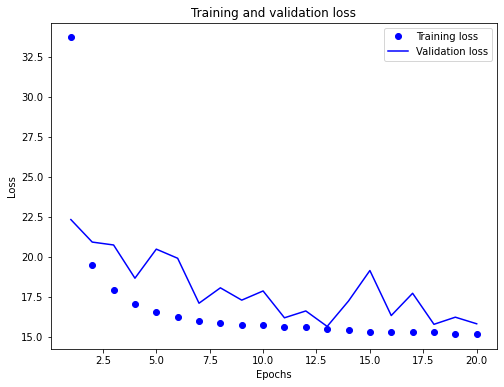

In [58]:
#loss graph for training and validation
history1=history.history
loss=history1['loss']
values=history1['val_loss']
epochs=range(1,len(loss)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [59]:
final_loss, final_acc=model.evaluate(test_dataset, verbose=0)
print("Final loss: {0:.6f}\n Final accuracy: {1:.6f}".format(final_loss, final_acc))

Final loss: 16.628372
 Final accuracy: 0.634199
